### CH 6 Decision Trees Exercises


1. What is the approximate depth of a decision tree trained (without restrictions)
   on a training set with one million instances?

If we left the tree without any restrictions, it may end up with one leaf for each training instance,
at bottom of the tree, it will has (assuming it is balanced) m nodes.
so the depth = $log_2(m)$. so the answer will be equal to $6\times log_2(10)$

<br>
<br>

2. Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally
   lower/higher, or always lower/higher?

in general it will be lower than it's parents, because it try to do splitting to minimize gini impurity, but we can see cases that one child gini impurity more than it's parent and the left this increase to other child as decreasing in it's gini impurity.

<br>
<br>

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing
   max_depth?

YES, that will reduce total numbers of nodes that have lower samples on it, ex: (number of samples at end depth would be 25 or even 10 instead of 1 or 2) and that will regularize the model

<br>
<br>

4. If a decision tree is underfitting the training set, is it a good idea to try scaling the
   input features?

trees are robust for feature scaling, but we can try to apply PCA transformation to make it easier for the tree model.

<br>
<br>

5. If it takes one hour to train a decision tree on a training set containing one
   million instances, roughly how much time will it take to train another decision
   tree on a training set containing ten million instances? Hint: consider the CART
   algorithm’s computational complexity.

building one tree takes $O(n\times mlog_2(m))$.

so training time will be multiply of K = $n\times 10mlog_2(10m) $ / $n\times mlog_2(m) $ = $10\*{7\over6} $ hours

<br>
<br>

6. If it takes one hour to train a decision tree on a given training set, roughly how
   much time will it take if you double the number of features?

two hours (twice time)


---


## 7. Train and fine-tune a decision tree for the moons dataset by following these steps:


##### a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.


In [11]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(10_000, noise=.4, random_state=32)

##### b. Use train_test_split() to split the dataset into a training set and a test set.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=3, stratify=y)

##### c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.


In [22]:
from sklearn.tree import DecisionTreeClassifier

basic_tree = DecisionTreeClassifier(random_state=0)
basic_tree.fit(X_train, y_train)

print('Train Score: ', basic_tree.score(X_train, y_train))
print('Test Score: ', basic_tree.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.789


##### MAX_DEPTH


In [80]:
from sklearn.model_selection import GridSearchCV

tree_grid = {
    'max_depth': range(2, 17),
}
Gsearch = GridSearchCV(DecisionTreeClassifier(
    random_state=3), param_grid=tree_grid, cv=5, verbose=1, scoring='accuracy')

In [81]:
Gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_depth': range(2, 17)}, scoring='accuracy',
             verbose=1)

In [82]:
Gsearch.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=3)

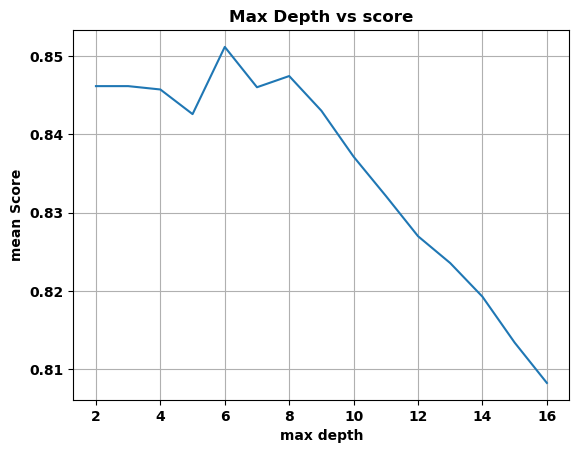

In [85]:
maxdepth = Gsearch.cv_results_['param_max_depth'].data
scores = Gsearch.cv_results_['mean_test_score']


plt.plot(maxdepth, scores)
plt.xlabel('max depth')
plt.ylabel('mean Score')
plt.grid()
plt.title('Max Depth vs score')
plt.show()

In [86]:
print('Train Score: ', Gsearch.score(X_train, y_train))
print('Test Score: ', Gsearch.score(X_test, y_test))

Train Score:  0.8657142857142858
Test Score:  0.8506666666666667


##### MAX_LEAFS_NODES


In [91]:
tree_grid = {
    'max_leaf_nodes': range(2, 64),
}
Gsearch = GridSearchCV(DecisionTreeClassifier(
    random_state=3), param_grid=tree_grid, cv=5, verbose=1, scoring='accuracy')

Gsearch.fit(X_train, y_train)

Gsearch.best_estimator_

Fitting 5 folds for each of 62 candidates, totalling 310 fits


DecisionTreeClassifier(max_leaf_nodes=26, random_state=3)

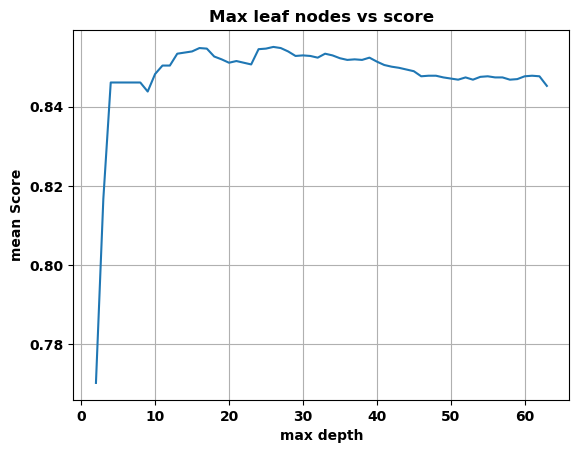

Train Score:  0.8631428571428571
Test Score:  0.851


In [92]:
maxdepth = Gsearch.cv_results_['param_max_leaf_nodes'].data
scores = Gsearch.cv_results_['mean_test_score']

plt.plot(maxdepth, scores)
plt.xlabel('max depth')
plt.ylabel('mean Score')
plt.grid()
plt.title('Max leaf nodes vs score')
plt.show()

print('Train Score: ', Gsearch.score(X_train, y_train))
print('Test Score: ', Gsearch.score(X_test, y_test))

let's try to find best params once!


In [103]:
tree_grid = {
    'max_leaf_nodes': range(2, 64),
    'max_depth': range(2, 18),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
Gsearch = GridSearchCV(DecisionTreeClassifier(
    random_state=3), param_grid=tree_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
# warning: this step will take so long time
# Gsearch.fit(X_train, y_train)

Gsearch.best_estimator_

Fitting 5 folds for each of 23808 candidates, totalling 119040 fits


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=29,
                       random_state=3)

In [105]:
Gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

##### d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.


In [110]:
BEAST_TREE = DecisionTreeClassifier(**Gsearch.best_params_)
BEAST_TREE.fit(X_train, y_train)

print('Train Score: ', BEAST_TREE.score(X_train, y_train))
print('Test Score: ', BEAST_TREE.score(X_test, y_test))

Train Score:  0.8652857142857143
Test Score:  0.853


#### 8. Grow a forest by following these steps:

##### a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.


In [120]:
from sklearn.model_selection import ShuffleSplit

n_splits = 1000
test_size = 0.3

shuffle_split = ShuffleSplit(
    n_splits=n_splits, train_size=100, random_state=42)

train_subsets = []
for i, (train_index, test_index) in enumerate(shuffle_split.split(X_train)):
    X_train_m, y_train_m = X[train_index], y[train_index]
    train_subsets.append([X_train_m, y_train_m])
    print(f'fold {i+1}', X_train_m.shape)

fold 1 (100, 2)
fold 2 (100, 2)
fold 3 (100, 2)
fold 4 (100, 2)
fold 5 (100, 2)
fold 6 (100, 2)
fold 7 (100, 2)
fold 8 (100, 2)
fold 9 (100, 2)
fold 10 (100, 2)
fold 11 (100, 2)
fold 12 (100, 2)
fold 13 (100, 2)
fold 14 (100, 2)
fold 15 (100, 2)
fold 16 (100, 2)
fold 17 (100, 2)
fold 18 (100, 2)
fold 19 (100, 2)
fold 20 (100, 2)
fold 21 (100, 2)
fold 22 (100, 2)
fold 23 (100, 2)
fold 24 (100, 2)
fold 25 (100, 2)
fold 26 (100, 2)
fold 27 (100, 2)
fold 28 (100, 2)
fold 29 (100, 2)
fold 30 (100, 2)
fold 31 (100, 2)
fold 32 (100, 2)
fold 33 (100, 2)
fold 34 (100, 2)
fold 35 (100, 2)
fold 36 (100, 2)
fold 37 (100, 2)
fold 38 (100, 2)
fold 39 (100, 2)
fold 40 (100, 2)
fold 41 (100, 2)
fold 42 (100, 2)
fold 43 (100, 2)
fold 44 (100, 2)
fold 45 (100, 2)
fold 46 (100, 2)
fold 47 (100, 2)
fold 48 (100, 2)
fold 49 (100, 2)
fold 50 (100, 2)
fold 51 (100, 2)
fold 52 (100, 2)
fold 53 (100, 2)
fold 54 (100, 2)
fold 55 (100, 2)
fold 56 (100, 2)
fold 57 (100, 2)
fold 58 (100, 2)
fold 59 (100, 2)
fold 6

In [123]:
len(train_subsets)

1000

##### b. Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.


In [135]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

forest = [clone(Gsearch.best_estimator_)for _ in range(1000)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, train_subsets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)

    accuracy_scores.append(accuracy_score(y_pred, y_test))

np.mean(accuracy_scores)

0.7933710666666667

##### c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.


In [136]:
from scipy.stats import mode

votes = np.empty(shape=(len(forest), len(X_test)))

for i, tree in enumerate(forest):
    votes[i] = tree.predict(X_test)

##### d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!


In [144]:
y_pred_majority_votes, n_votes = mode(votes, axis=0)

In [146]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8602